----

<center><h2>Machine Learning Project : CI - Letter Recognition</h2></center><br>
<center><h3>Predict the letter category based on its attributes</h3></center>

* <B>Created by : Sudeep Raj</B>

## Table of contents
1. Objective
2. Data Fields
3. Data Loading and Visualization
4. Model Training
 * Random Forest Classifier
 * KNN
 * XGBoost
 * Support Vector Classifier
 * Ensemble Learning
5. Test Predictions
 * Support Vector Classifier
 * Random Forest Classifier
6. Conclusion

### 1. Objective

The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.

### 2. Data fields
| Columns | Description |
|--------- | --------------|
| letter | capital letter (26 values from A to Z) | 
| x-box | horizontal position of box |
| y-box | vertical position of box |
| width | width of box |
| high | height of box |
| onpix | total # on pixels |
| x-bar | mean x of on pixels in box |
| y-bar | mean y of on pixels in box |
| x2bar | mean x variance |
| y2bar | mean y variance |
| xybar | mean x y correlation | 
| x2ybr | mean of x * x * y |
| xy2br | mean of x * y * y |
| x-ege | mean edge count left to right | 
| xegvy | correlation of x-ege with y |
| y-ege | mean edge count bottom to top | 
| yegvx | correlation of y-ege with x |

### 3. Data Loading and Visualization

Character A to Z, dimensions are provided and a traing dataset is used to train our model.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline   
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df_train  =  pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_train.csv')
df_train.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,4
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,5


In [5]:
df_test  =  pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/LetterRecognition_test.csv')
df_test.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8,16001
1,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10,16002
2,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8,16003
3,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7,16004
4,5,8,8,6,6,5,8,3,6,10,8,8,4,8,4,6,16005


In [6]:
df_train.shape

(16000, 18)

16k records we are using to train our model.

In [7]:
df_train.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
id        0
dtype: int64

We don't have any null or missing values.<br>
Data looks good.

In [8]:
df_test.shape

(3999, 17)

To test our model we have 4k records.

In [9]:
df_test.isnull().sum()

x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
id       0
dtype: int64

Similarly the data don't have any missing records.

In [10]:
df_train.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,4.020313,7.029063,5.117500,5.366000,3.500625,6.892688,7.512000,4.627562,5.170187,8.286625,6.471063,7.927062,3.049313,8.343937,3.682313,7.796125,8000.500000
std,1.908436,3.303998,2.003202,2.262656,2.192613,2.029576,2.333494,2.711330,2.384917,2.485706,2.641917,2.071988,2.342829,1.550055,2.571245,1.603464,4618.946489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,4000.750000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,8000.500000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,12000.250000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16000.000000


In [11]:
df_train.letter.unique()

array(['I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F',
       'C', 'T', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [12]:
df_train['letter'].value_counts()

M    648
U    646
T    644
Y    641
D    638
P    635
A    633
B    630
V    628
X    628
F    622
N    617
E    616
Q    615
O    614
W    613
G    609
L    604
J    599
R    597
C    594
K    593
I    590
S    587
H    583
Z    576
Name: letter, dtype: int64

From the below graph we can see the count of characters.

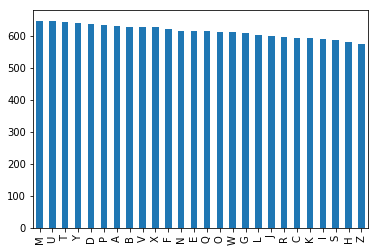

In [13]:
df_train['letter'].value_counts().plot.bar()

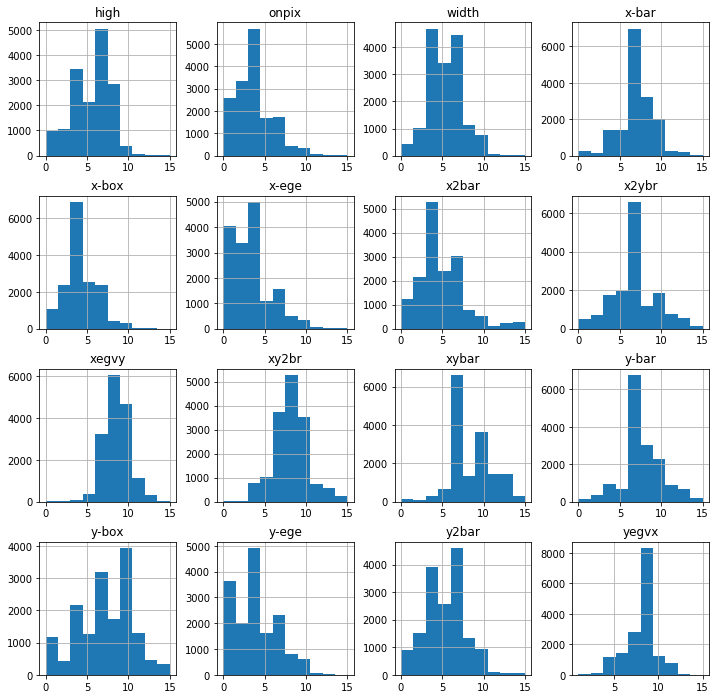

In [17]:
X.hist(figsize=[12,12])
plt.show()

To visualize our data, we have created histogram of all the columns.

#### Creating X and y variables

We are removing the __index__ column from the data set.<br>
y variable is used to store the __letter__ column.

In [15]:
X = df_train.iloc[:,1:-1]
print(X.head())

   x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      5     12      3     7      2     10      5      5      4     13      3   
1      4     11      6     8      6     10      6      2      6     10      3   
2      7     11      6     6      3      5      9      4      6      4      4   
3      2      1      3     1      1      8      6      6      6      6      5   
4      4     11      5     8      3      8      8      6      9      5      6   

   xy2br  x-ege  xegvy  y-ege  yegvx  
0      9      2      8      4     10  
1      7      3      7      3      9  
2     10      6     10      2      8  
3      9      1      7      5     10  
4      6      0      8      9      7  


In [18]:
y = df_train.iloc[:,0]
print(y.head())

0    I
1    D
2    N
3    G
4    S
Name: letter, dtype: object


In [19]:
X.shape

(16000, 16)

In [20]:
y.shape

(16000L,)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Splitting our data in 80:20 ratio.

### 4. Model Training

#### 4.1 Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=245,criterion='entropy',random_state=0,min_samples_split=2)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=245, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
y_pred=rfc.predict(X_test)

from sklearn.metrics import accuracy_score
ac= accuracy_score(y_test,y_pred)
print('Accuracy is :',ac*100)

('Accuracy is :', 96.21875)


#### 4.2 KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='brute',n_neighbors =1 ,leaf_size=100,p=30)
knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test) 

acc=accuracy_score(y_test,knn_predictions)
print('Accuracy is :',acc*100)

('Accuracy is :', 94.5625)


#### 4.3 XGBoost

In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=1.0)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.97%


#### 4.4 Support Vector Classifier

In [26]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1E01,tol=0.1)
svc.fit(X_train, y_train)
predicted= svc.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.28%


#### 4.5 Ensemble Learning

##### Model 1 : Random Forest Classifier, KNN, Support vector classifier

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('rfc', model1))
model2 = KNeighborsClassifier()
estimators.append(('knn', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

0.9595312500000001


In [29]:
ensemble.fit(X_train, y_train)
VotingClassifier_predictions = ensemble.predict(X_test) 

acc=accuracy_score(y_test,VotingClassifier_predictions)
print('Accuracy is :',acc*100)

('Accuracy is :', 96.09375)


##### Model 2 : Random Forest Classifier, Support vector classifier

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('rfc', model1))
model2 = SVC()
estimators.append(('svm', model2))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

0.936328125


In [31]:
ensemble.fit(X_train, y_train)
VotingClassifier_predictions = ensemble.predict(X_test) 

acc=accuracy_score(y_test,VotingClassifier_predictions)
print('Accuracy is :',acc*100)

('Accuracy is :', 93.96875)


`Algorithm Accuracy Table`

| Algorithm | Accuracy |
|--------- | --------------|
| Random Forest Classifier | 96.22 |
| KNeighbors Classifier | 94.56 |
| XGBoost | 83.97 |
| Supervised Vector Classifier | 97.28 |
| Ensemble - Model1 | 95.87 |
| Ensemble - Model2 | 94.09 |

From the above algorithm we have can see that __Supervised Vector Classifer__ gives the highest accuracy. 

### 5. Test Predictions

Test dataset is already imported in __df_test__

In [32]:
df_test.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8,16001
1,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10,16002
2,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8,16003
3,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7,16004
4,5,8,8,6,6,5,8,3,6,10,8,8,4,8,4,6,16005


We have to remove the __id__ colunm.

In [35]:
X1 = df_test.iloc[:,:-1]
print(X1.head())

   x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      6      9      8     4      3      8      7      3      4     13      5   
1      6      9      8     8     10      7      7      5      4      7      6   
2      5      6      6     4      3      7      6      2      7      7      6   
3      5      9      7     6      4      9      7      3      5     10      4   
4      5      8      8     6      6      5      8      3      6     10      8   

   xy2br  x-ege  xegvy  y-ege  yegvx  
0      8      6      8      0      8  
1      8      7      9      7     10  
2      9      0      9      4      8  
3      6      5      8      1      7  
4      8      4      8      4      6  


In [36]:
X1.shape

(3999, 16)

### 5.1 Support Vector Classifier

In [37]:
y_pred_svc = svc.predict(X1)

In [38]:
y_pred_svc

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [39]:
output_svc = pd.DataFrame(y_pred_svc, index=df_test.id, columns=['letter'])
output_svc.to_csv('output_svc.csv')

### 5.2 Random Forest Classifier

In [40]:
y_pred_rfc = rfc.predict(X1)

In [41]:
y_pred_rfc

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [42]:
output_rfc = pd.DataFrame(y_pred_rfc, index=df_test.id, columns=['letter'])
output_rfc.to_csv('output_rfc.csv')

### 6. Conclusion

| Algorithm | Accuracy |
|--------- | --------------|
| Random Forest Classifier | 96.22 |
| KNeighbors Classifier | 94.56 |
| XGBoost | 83.97 |
| Supervised Vector Classifier | 97.28 |
| Ensemble - Model1 | 95.87 |
| Ensemble - Model2 | 94.09 |

* We trained our model and predicted the letters with the help of test dataset.
* __SVC__ provides the maximum accuracy and __Random Forest__ being the second.
* We have verified the two output file __output_svc__ and __output_rfc__. 
* Comparing the output file and calculated the difference, __3825__ records predicted correctly from __3999__ when we compare __SVC__ model as reference.

-----